<a href="https://colab.research.google.com/github/Hiba567/Attendance/blob/main/Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
data_dir="/content/diseases"

In [3]:
 rmdir /content/diseases/".ipynb_checkpoints"

In [4]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 270 files belonging to 6 classes.
Using 216 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 270 files belonging to 6 classes.
Using 54 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['bacterial-leaf-spot', 'early-blight', 'late-blight', 'mosaic-virus', 'other', 'powdery-mildew']


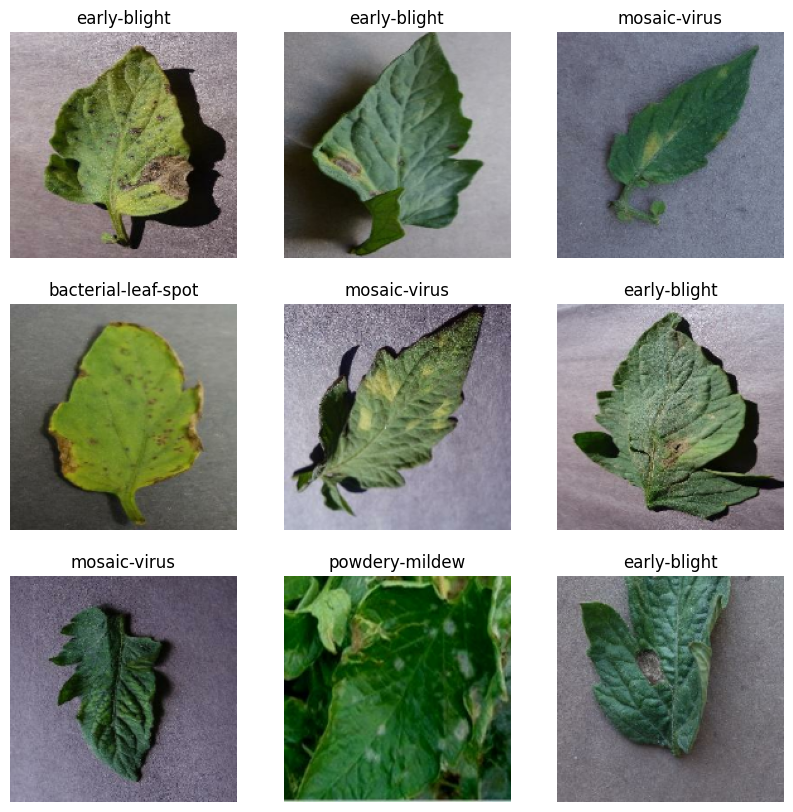

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
num_classes = 6

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


7/7 [==============================] - 11s 1s/step - loss: 2.9073 - accuracy: 0.1852 - val_loss: 1.7830 - val_accuracy: 0.1852
Epoch 2/5
7/7 [==============================] - 8s 1s/step - loss: 1.6901 - accuracy: 0.2870 - val_loss: 1.7238 - val_accuracy: 0.2778
Epoch 3/5
7/7 [==============================] - 9s 1s/step - loss: 1.6190 - accuracy: 0.3565 - val_loss: 1.6212 - val_accuracy: 0.3148
Epoch 4/5
7/7 [==============================] - 10s 1s/step - loss: 1.4485 - accuracy: 0.4676 - val_loss: 1.5056 - val_accuracy: 0.3889
Epoch 5/5
7/7 [==============================] - 8s 1s/step - loss: 1.2286 - accuracy: 0.5000 - val_loss: 1.3338 - val_accuracy: 0.4074


In [13]:
from PIL import Image
from numpy import asarray
import glob
import os
#image = Image.open('/content/Data/1.jpg')
 
# summarize some details about the image
# print(image.format)
# print(image.size)
# print(image.mode)
  
# load the image and convert into
# numpy array

path='/content/Data'
files = os.listdir(path)
paths = [os.path.join(path, basename) for basename in files]
print(max(paths, key=os.path.getctime))
photo=max(paths, key=os.path.getctime)

#img = Image.open('/content/Data/1.jpg')
img = Image.open(photo)
# asarray() class is used to convert
# PIL images into NumPy arrays
numpydata = asarray(img)

def predict_image(img):
  import cv2
  img = cv2.resize(numpydata , (180 , 180))
  print(img.shape)
  img_4d=img.reshape((-1,180,180,3))
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(5)}

/content/Data/0a4b3cde-c83a-4c83-b037-010369738152___RS_Late.B 6985.JPG


In [14]:
x=predict_image(numpydata)
res=max(x, key=x.get)
print("the max value is:")
print(res)

(180, 180, 3)
1/1 [==============================] - 0s 62ms/step
the max value is:
late-blight


In [15]:
print("Causes:")
print ("the disease detected is:", res)
if res=="powdery-mildew":
  cause="the causes are high humidity."
elif res=="early-blight":
  cause="the cause is fungus Alternaria solani which survives in plant debris or on infected plants."
elif res=="bacterial-leaf-spot":
  print("the causes of",res," is Xanthomonas campestris pv. vesicatoria. It is a gram-negative, rod-shaped bacterium that can survive in seeds and plant debris from one season to another")
elif res=="late-blight":
  cause="the cause is fungus Phytophthora infestans."
elif res=="Leaf_mold":
  cause="the cause is the fungus Passalora fulva."
  #print("the cause of",res,"is the fungus Passalora fulva.")
elif res=="mosaic-virus":
  cause="the cause is that aphid activity in fields is high"
else:
  print("causes not detected")

Causes:
the disease detected is: late-blight


In [ ]:
print("Treatment")
TRAIN_DATA=[ ('Baking soda has been proved by many gardeners to be effective in treating powdery mildew',{'entities':[(1,11,'powdery')]}),
 ('Milk spray is another effective home',{'entities':[(1,10,'powdery')]} ),
('applying fungicides when necessary', {'entities': [(9, 19, 'lateblight')]}),
 ('Air drainage to facilitate the drying of foliage each day is important.',{'entities':[(1,12,'lateblight')]}),
 ('Cover the soil under the plants with mulch', {'entities': [(37, 42, 'earlyblight')]}),
 ('Vinegar is a proven method for destroying mold',{'entities':[(1,7,'leafmold')]})]

Treatment


In [ ]:
import pandas as pd
import os
from tqdm import tqdm
import spacy
from spacy.tokens import DocBin

os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

#nlp = spacy.blank("en") # load a new spacy model
nlp = spacy.load("en_core_web_sm") # load other spacy model

db = DocBin() # create a DocBin object

for text, annot in tqdm(TRAIN_DATA): # data in previous format
    doc = nlp.make_doc(text) # create doc object from text
    ents = []
    for start, end, label in annot["entities"]: # add character indexes
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)
    doc.ents = ents # label the text with the ents
    db.add(doc)

#os.chdir(r'C:\Users\HP\Desktop\NLPTEST')
db.to_disk("./train.spacy") # save the docbin object

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
100%|██████████| 6/6 [00:00<00:00, 1128.26it/s]

Skipping entity


In [ ]:
nlp1 = spacy.load(r"/content/output/model-best") #load the best model
doc = nlp1("applying fungicides when necessary") # input sample text

spacy.displacy.render(doc, style="ent", jupyter=True) # display in Jupyter


In [16]:
import requests
#page=requests.get("https://www.planetnatural.com/pest-problem-solver/plant-disease/early-blight/")
page=requests.get(f"https://www.planetnatural.com/pest-problem-solver/plant-disease/{res}/")
url=f"https://www.planetnatural.com/pest-problem-solver/plant-disease/{res}/"

In [17]:
from bs4 import BeautifulSoup
from bs4.element import SoupStrainer
#def main(page):

src = page.content
soup=BeautifulSoup(src, "lxml")
matches_details=[]
  #treat=soup.find_all("div",{'class':'post-entry'})
for elem in soup.find_all("div",{'class':'post-entry'}):
    ol = elem.find('ol')
    if ol:
      treat=ol.text
      print(url)
      print(treat)

https://www.planetnatural.com/pest-problem-solver/plant-disease/late-blight/

Plant resistant cultivars when available.
Remove volunteers from the garden prior to planting and space plants far enough apart to allow for plenty of air circulation.
Water in the early morning hours, or use soaker hoses, to give plants time to dry out during the day — avoid overhead irrigation.
Destroy all tomato and potato debris after harvest (see Fall Garden Cleanup).



In [18]:
# Import the beautifulsoup and request libraries of python.
import requests
import bs4
# Make two strings with default google search URL
# 'https://google.com/search?q=' and
# our customized search keyword.
# Concatenate them
url = 'https://google.com/search?q=treatment+' + res
# Fetch the URL data using requests.get(url),
# store it in a variable, request_result.
request_result=requests.get( url )

In [19]:
# Creating soup from the fetched request
soup = bs4.BeautifulSoup(request_result.text,
                         "html.parser")

f = open("result.txt", "a")
f.write("The disease detected is "+res + '\n')
f.write("The causes are "+ cause +'\n')
f.write("The treatment is "+ treat + url +'\n')
f.write("Other suggestions from the Web: ")

# soup.find.all( h3 ) to grab 
# all major headings of our search result,
#heading_object=soup.find_all("h3", limit=3)

#links=soup.find_all('div', class_='byrV5b',limit=3)
# Iterate through the object 
# and print it as a string.

#page_soup = soup(page_html,"html.parser") 
#print(soup)
#-value = soup.findAll("div",{"class":"egMi0 kCrYT"},  limit=3)

#-for val in value:
  #-print(val.text)

links = soup.find_all("a")

for link in links:
    link_href = link.get('href')
    if "url?q=" in link_href and not "webcache" in link_href:
      title = link.find_all('h3')
      if len(title) > 0:
          with open("result.txt", "a") as f:
            f.write(title[0].getText())
            f.write('\n')
            f.write(link.get('href').split("?q=")[1].split("&sa=U")[0])
            f.write('\n')
            
            f.close()
          #print(link.get('href').split("?q=")[1].split("&sa=U")[0])
          #print(title[0].getText())
          #print("------")


In [20]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 KB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 5.0 MB/s eta 0:00:00


In [21]:
%%writefile app.py
import streamlit as st
import linecache
st.title(':leaves: :green[Diseased plant diagnosis]:herb:')
f = open("result.txt", "r")
st.subheader(':orange[The disease detected is]')
st.write(linecache.getline(r"result.txt", 1))
st.subheader(':blue[The causes of the disease are:]')
st.write(linecache.getline(r"result.txt", 2))
st.subheader(':violet[The treatment of the disease are:]')
for i in range(3):
        next(f)
for line in f:
        st.write(line)
#st.write(f.read())

Writing app.py


In [23]:
!streamlit run app.py & npx localtunnel --port 8501

[#######...........] / extract:localtunnel: verb lock using /root/.npm/_locks/s


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.74.10.147:8501

npx: installed 22 in 2.781s
your url is: https://eleven-spies-tickle-34-74-10-147.loca.lt
  Stopping...
^C
